In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd
import cv2

from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
alldata= np.load(file="alldata.npy")
alllable=pd.read_csv('label_binary.csv')
label=[]
for i in range(3000):
    data = alllable['label'][i]
    if data == 'no_tumor':
        #label.append(data)
        label.append(0)
    else:
        #label.append('meningioma_tumor')
        label.append(1)
label = np.array(label)
#按照6：2：2的结构来分成训练集，测试集和验证集
train_images,test_images,train_labels,test_labels=train_test_split(alldata,label,test_size=0.2,random_state=0)
train_images,val_images,train_labels,val_labels=train_test_split(train_images,train_labels,test_size=0.25,random_state=0)

In [3]:
label

array([1, 0, 1, ..., 1, 1, 1])

In [4]:
class_names1 = ['tumor','no_tumor']

In [5]:
model = models.Sequential([
  layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(204,204,1)),
  layers.MaxPooling2D(pool_size=2),
  layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
  layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
  layers.Conv2D(128, kernel_size=3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2),
  layers.Flatten(),
  layers.Dense(units=128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(units=64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation="sigmoid") #, activation="sigmoid"
]) 
model.summary()
#from_logits=True 表示 crossEntropy 层的输入是正常的张量/logits，而如果 from_logits=False，则表示输入是一个概率，通常你应该在最后一层有一些 softmax 激活

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 204, 204, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 102, 102, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 102, 102, 64)      18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 102, 102, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 51, 51, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 51, 51, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 51, 51, 128)       1

In [6]:
train_images = train_images.reshape((1800, 204, 204, 1))
test_images=test_images.reshape((600, 204, 204, 1))
val_images=test_images.reshape((600, 204, 204, 1))
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
#epoch 迭代次数
history =model.fit(train_images, train_labels, batch_size=32, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
57/57 [==============================] - 6s 56ms/step - loss: 1.4360 - accuracy: 0.8244 - val_loss: 0.3643 - val_accuracy: 0.8517
Epoch 2/15
57/57 [==============================] - 2s 41ms/step - loss: 0.3456 - accuracy: 0.8544 - val_loss: 0.2865 - val_accuracy: 0.8600
Epoch 3/15
57/57 [==============================] - 2s 41ms/step - loss: 0.2845 - accuracy: 0.8733 - val_loss: 0.2468 - val_accuracy: 0.8783
Epoch 4/15
57/57 [==============================] - 2s 41ms/step - loss: 0.2239 - accuracy: 0.8906 - val_loss: 0.1993 - val_accuracy: 0.9017
Epoch 5/15
57/57 [==============================] - 2s 41ms/step - loss: 0.1866 - accuracy: 0.9194 - val_loss: 0.1930 - val_accuracy: 0.9150
Epoch 6/15
57/57 [==============================] - 2s 41ms/step - loss: 0.1810 - accuracy: 0.9250 - val_loss: 0.2635 - val_accuracy: 0.8900
Epoch 7/15
57/57 [==============================] - 2s 41ms/step - loss: 0.1515 - accuracy: 0.9328 - val_loss: 0.1960 - val_accuracy: 0.9200
Epoch 8/15
57

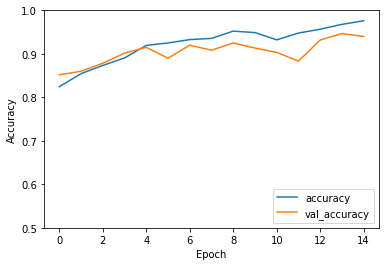

19/19 - 0s - loss: 2.0125 - accuracy: 0.7533
0.753333330154419


In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(val_images, val_labels, verbose=2)
print(test_acc)